In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,  Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [204]:
train = pd.read_csv("real_full.csv", encoding="utf-8", index_col=0)
test = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
submission = pd.read_csv("sample_submission.csv", encoding="utf-8", index_col=0)

In [205]:
x_train = train.values[:,:113]
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_train.shape

(78587, 1, 113)

In [206]:
y_train = train.values[:, 113:]
y_train.shape
print(y_train.shape)

(78587, 12)


In [207]:
x_test = test.values[:,:113]
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
x_test.shape

(10000, 1, 113)

In [208]:
model = Sequential()
model.add(LSTM(128, input_shape = (1, 113), return_sequences=True))
model.add(LSTM(128, return_sequences=False))

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(12, activation = "linear"))



In [209]:
losses=tf.compat.v1.losses.log_loss
model.compile(loss = 'mse', optimizer='adam')

In [210]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_85 (LSTM)               (None, 1, 128)            123904    
_________________________________________________________________
lstm_86 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_94 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_69 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 12)              

In [211]:
hist_model = model.fit(x_train, y_train,
                       epochs = 50,
                       batch_size = 256,
                       verbose = 2, 
                       validation_split=0.2)

Train on 62869 samples, validate on 15718 samples
Epoch 1/50
62869/62869 - 4s - loss: 2839.3863 - val_loss: 1590.5989
Epoch 2/50
62869/62869 - 2s - loss: 2241.8025 - val_loss: 1621.7816
Epoch 3/50
62869/62869 - 2s - loss: 2208.6090 - val_loss: 1617.8050
Epoch 4/50
62869/62869 - 2s - loss: 2182.3531 - val_loss: 1588.7203
Epoch 5/50
62869/62869 - 2s - loss: 2180.4982 - val_loss: 1624.8470
Epoch 6/50
62869/62869 - 2s - loss: 2170.6234 - val_loss: 1556.0525
Epoch 7/50
62869/62869 - 2s - loss: 2164.6443 - val_loss: 1566.4971
Epoch 8/50
62869/62869 - 2s - loss: 2162.7599 - val_loss: 1548.7142
Epoch 9/50
62869/62869 - 2s - loss: 2149.2356 - val_loss: 1574.7934
Epoch 10/50
62869/62869 - 2s - loss: 2139.7605 - val_loss: 1569.3308
Epoch 11/50
62869/62869 - 2s - loss: 2118.8003 - val_loss: 1567.2555
Epoch 12/50
62869/62869 - 2s - loss: 2109.5757 - val_loss: 1518.4889
Epoch 13/50
62869/62869 - 2s - loss: 2097.9132 - val_loss: 1533.8346
Epoch 14/50
62869/62869 - 2s - loss: 2132.4214 - val_loss: 154

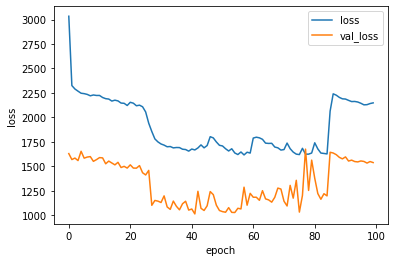

In [170]:
plt.plot(hist_model.history["loss"], label="loss")
plt.plot(hist_model.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend();

In [132]:
pred = model.predict(x_test)
submission = pd.DataFrame(data=pred, columns=submission.columns, index=submission.index)
submission.to_csv('submission.csv')

NameError: name 'accuracy_score' is not defined

In [130]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,10,11
0,25.816435,18.384983,11.561803,11.680150,20.392990,36.157146,60.485447,104.751434,99.639961,76.672813,60.943192,38.617653
1,27.148085,19.724081,12.783566,12.828841,21.193600,35.388569,57.453129,98.743065,94.415794,73.464233,59.098015,38.871811
2,16.945625,12.854000,8.523626,8.871575,14.705242,26.672905,48.691536,87.815788,82.669685,59.749470,45.453178,26.678934
3,25.055782,18.501987,12.216371,12.296256,19.865940,32.732552,53.119549,91.697510,87.619232,67.611183,54.276627,35.722042
4,26.389421,19.286533,12.579819,12.641677,20.721073,34.444138,55.970543,96.397217,92.137856,71.445335,57.403954,37.734249
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19.854904,13.034678,7.680859,8.874993,18.138737,48.904655,94.444618,162.812546,151.249680,108.525780,82.183159,42.008686
9996,25.777029,15.625529,9.185160,10.601272,23.399361,65.590004,119.184578,199.166458,185.127319,135.725327,105.884140,55.073059
9997,4.825581,3.859791,2.817945,3.113947,5.253520,10.520111,21.813438,40.949821,38.393986,25.780890,18.643789,9.941233
9998,16.814785,12.515949,8.387506,8.536674,13.956516,24.031603,40.289669,70.519119,67.042160,50.406429,39.865341,25.289354


In [95]:
pred

array([[23.501987, 16.37033 , 10.75029 , ..., 74.77226 , 60.320896,
        37.20777 ],
       [23.86164 , 16.950544, 11.630785, ..., 71.34572 , 58.189964,
        36.637154],
       [22.469645, 16.052803, 11.005165, ..., 67.59496 , 54.904236,
        34.46362 ],
       ...,
       [11.44028 ,  9.498976,  7.267996, ..., 30.042946, 23.63657 ,
        15.778616],
       [16.411518, 12.242727,  8.532096, ..., 49.547935, 39.470127,
        24.851988],
       [26.138067, 18.39378 , 12.54501 , ..., 78.00112 , 63.913284,
        40.357704]], dtype=float32)

new(max-min)+min

In [375]:
m=[5,6,7,8,9,10,11,0,1,2,3,4]
for i in range(12):
    print(Q[m[i]][1]-Q[m[i]][0])
    pred[i]=pred[i]*(Q[m[i]][1]-Q[m[i]][0])+Q[m[i]][0]

67.19
65.22
61.26
58.29
50.43
44.48
47.48
60.25000000000001
59.36000000000001
58.39
59.36000000000001
65.22


In [376]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,10,11
0,54.275368,44.940422,34.457451,42.191853,46.222931,66.582878,62.416100,66.508987,66.872818,63.715225,63.395012,61.433357
1,50.709290,43.119938,32.100288,40.186535,43.294388,60.428558,54.498222,57.770103,59.106735,55.789558,55.626884,55.182640
2,45.949886,38.707985,28.805576,36.227657,39.525131,54.736698,48.728020,51.577141,52.394642,50.066868,50.117920,49.067394
3,44.577759,37.792194,28.151157,35.799732,37.970444,51.212330,43.906700,46.007271,47.558506,45.474281,45.402725,45.873116
4,41.000618,34.109642,26.823212,32.571686,34.491924,46.380199,39.721855,42.432495,42.777657,41.679394,41.650055,42.102146
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.566662,0.446178,0.304112,0.416349,0.461440,0.683042,0.574850,0.618674,0.625392,0.608227,0.599204,0.599680
9996,0.430561,0.302477,0.142939,0.252700,0.326458,0.652774,0.629593,0.693860,0.694880,0.635667,0.630691,0.575483
9997,0.327244,0.231922,0.129933,0.224990,0.241413,0.434097,0.381255,0.414622,0.411196,0.393877,0.385494,0.380443
9998,0.576975,0.426287,0.263627,0.385714,0.448159,0.761512,0.689876,0.749950,0.757815,0.712821,0.703512,0.683807


In [300]:
pd.DataFrame(pred*(Q[5][1]-Q[5][0])+Q[5][1])

,0,1,2,3,4,5,6,7,8,9,10,11
0,81.746246,75.149681,67.741859,73.207397,76.055969,90.443375,87.498917,90.391167,90.648270,88.416946,88.190666,86.804459
1,83.490036,77.965004,69.942726,75.829498,78.092003,90.565643,86.248367,88.630287,89.603348,87.188461,87.070030,86.746628
2,83.783859,78.170975,70.496040,76.248573,78.804306,90.594139,85.937073,88.145302,88.778915,86.974754,87.014328,86.200104
3,85.632980,80.105820,72.252731,78.482864,80.251007,91.037163,85.086380,86.797394,88.060944,86.363251,86.304962,86.688110
4,86.670158,80.182281,73.322083,78.734291,80.542198,91.735046,85.466194,88.018272,88.343246,87.309227,87.281601,87.707245
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,84.275093,78.554543,71.809235,77.138245,79.279190,89.800827,84.663864,86.744629,87.063591,86.248596,85.820190,85.842789
9996,77.813034,71.731590,64.156754,69.368187,72.870232,88.363708,87.263077,90.314453,90.362907,87.551460,87.315186,84.693932
9997,72.907562,68.381638,63.539230,68.052498,68.832283,77.980919,75.471985,77.056259,76.893578,76.071289,75.673264,75.433441
9998,84.764771,77.610107,69.887009,75.683716,78.648575,93.526566,90.125313,92.977631,93.351059,91.214722,90.772728,89.837173


In [222]:
all_max=np.max(np.max(train)) 
all_max

207.56

In [233]:
all_min=np.min(np.min(train.replace(0,np.nan)))
all_min

0.03

In [225]:
dist=all_max-all_min
dist

207.56

In [228]:
A=pred*dist+all_min

In [229]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9,10,11
0,165.590958,161.784836,174.035110,150.293533,147.548843,154.610367,168.146164,164.116699,172.467896,181.003708,156.422241,134.885742
1,180.597290,167.885574,201.550797,160.532898,173.400909,167.904037,179.434937,180.985489,194.443741,197.822052,167.357880,149.109589
2,170.860596,165.808304,186.640625,155.316803,155.536255,158.121292,186.983078,171.175415,185.457794,188.226608,166.010773,137.278107
3,177.674210,168.062027,191.134521,160.212830,163.824692,166.955658,185.489349,182.956543,189.992142,194.204117,171.529007,143.486160
4,158.582062,149.382156,173.445328,151.550049,148.816360,152.693253,158.212158,156.162292,176.044861,167.844513,155.400528,130.000702
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,164.141739,156.997238,171.923660,148.272339,152.599686,154.082336,168.210724,159.913147,175.787033,179.058685,158.957520,132.443069
9996,179.708176,167.991379,189.240463,153.653839,161.981171,163.290527,182.441879,179.840698,189.705246,188.699631,164.048691,133.147293
9997,111.694061,113.776649,106.330070,102.735962,110.505661,101.703896,105.853050,108.448227,116.595665,114.932137,109.302628,106.115570
9998,166.208984,161.082718,173.052353,148.904907,158.204636,138.951523,157.263580,160.209351,181.235321,174.229584,147.218689,134.121536


In [ ]:
#유사도

In [107]:
cos_train=pd.read_csv('train.csv',encoding="utf-8", index_col=0)

In [109]:
cos_train

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
id,,,,,,,,,,,,,,,,,,,,,
0,26.68,11.86,19.77,14.83,7.90,2.96,5.93,4.94,4.94,4.94,...,1.97,0.98,2.96,4.94,6.91,9.88,0.00,2.96,7.90,4.94
1,107.73,77.09,79.09,4.94,48.44,22.74,33.61,23.72,23.72,25.70,...,11.85,11.85,19.76,22.73,38.54,145.28,56.33,62.26,58.31,32.61
2,94.88,90.93,78.10,66.24,38.55,25.70,27.68,26.69,18.78,15.81,...,0.00,0.00,0.00,0.00,81.04,130.45,71.15,0.00,0.00,0.00
3,0.00,0.00,149.29,51.41,6.92,8.89,2.96,2.96,1.97,3.95,...,0.00,0.00,5.92,26.68,74.12,158.12,159.11,105.75,86.97,43.48
4,97.85,97.85,70.19,60.31,31.63,25.70,20.76,22.74,20.76,20.76,...,8.89,8.89,16.80,22.73,20.75,26.68,32.61,19.76,21.74,15.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78582,123.55,129.48,91.94,50.42,26.69,8.89,6.92,4.94,3.95,7.90,...,9.88,12.84,29.64,38.54,57.32,92.90,81.04,70.17,56.33,39.53
78583,15.81,0.00,0.00,88.98,176.97,40.53,14.83,13.84,19.77,69.20,...,19.76,20.75,23.71,33.60,60.28,46.45,53.36,36.57,44.47,29.65
78584,36.57,25.69,7.90,8.89,5.93,4.94,4.94,3.95,4.94,7.90,...,4.94,3.95,5.92,6.91,6.91,18.77,22.73,17.79,9.88,6.91


In [117]:
sum_train=cos_train.sum()

SyntaxError: invalid syntax (<ipython-input-117-81b7f0a89836>, line 1)

In [122]:
sum_train=[]
sum_train=cos_train.sum()
sum_train

2009-01    8300832.38
2009-02    8318649.76
2009-03    6284447.76
2009-04    5263689.93
2009-05    3109702.12
              ...    
2019-01    8124562.32
2019-02    7694185.45
2019-03    5885051.48
2019-04    4758119.92
2019-05    3002373.07
Length: 125, dtype: float64

In [134]:
sum_train[124]

3002373.069999815

In [167]:
def year_sum(sum_train[, n):
    sum_t=[]
    for i in range(0,n,12):
        if(i==n-1):
            sum_t.append(sum_train[i])
        else:
            sum_t.append(sum_train[i]+sum_train[i+12])
    return sum_t
        


SyntaxError: invalid syntax (<ipython-input-167-26fa6413ff05>, line 1)

In [163]:
year_sum(sum_train, 125)

TypeError: 'int' object is not subscriptable

In [146]:
sum_train(range(0,125,12))

TypeError: 'int' object is not callable

In [ ]:
print(np.dot(v,w) / (np.sqrt(np.dot(v,v)) * np.sqrt(np.dot(w,w))))   # cosine sim